In [157]:
#import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [158]:
import pandas as pd
import numpy as np

In [159]:
data = pd.read_csv(r'E:\datascience\heart\heart.csv')


In [160]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [161]:
#encode the categorical values
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [162]:
enc_ecg={'Normal':1, 'ST':2,'LVH':3}

In [163]:
enc_ecg

{'Normal': 1, 'ST': 2, 'LVH': 3}

In [164]:
data.RestingECG.map(enc_ecg)

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    3
917    1
Name: RestingECG, Length: 918, dtype: int64

In [165]:
data.RestingECG = data.RestingECG.map(enc_ecg)

In [166]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,2,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,1,122,N,0.0,Up,0


In [167]:
data.ExerciseAngina

0      N
1      N
2      N
3      Y
4      N
      ..
913    N
914    N
915    Y
916    N
917    N
Name: ExerciseAngina, Length: 918, dtype: object

In [168]:
enc_ang={'N':0, 'Y':1}
data.ExerciseAngina.map(enc_ang)

0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: int64

In [169]:
data.ExerciseAngina = data.ExerciseAngina.map(enc_ang)

In [170]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,1,156,0,1.0,Flat,1


In [171]:
#encode St-slop
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [172]:
enc_slope={'Up':0, 'Flat':1,'Down':2}

In [173]:
data.ST_Slope.map(enc_slope)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: ST_Slope, Length: 918, dtype: int64

In [174]:
data.ST_Slope = data.ST_Slope.map(enc_slope)

In [175]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,0,0
1,49,F,NAP,160,180,0,1,156,0,1.0,1,1


In [176]:
#encode 
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [177]:
enc_chest={'ATA':0, 'NAP':1,'ASY':2,'TA':3}

In [178]:
data.ChestPainType.map(enc_chest)

0      0
1      1
2      0
3      2
4      1
      ..
913    3
914    2
915    2
916    0
917    1
Name: ChestPainType, Length: 918, dtype: int64

In [179]:
data.ChestPainType = data.ChestPainType.map(enc_chest)

In [180]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,1,172,0,0.0,0,0
1,49,F,1,160,180,0,1,156,0,1.0,1,1


In [181]:
#encode 
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [182]:
enc_sex={'M':0, 'F':1}

In [183]:
data.Sex.map(enc_sex)

0      0
1      1
2      0
3      1
4      0
      ..
913    0
914    0
915    0
916    1
917    0
Name: Sex, Length: 918, dtype: int64

In [184]:
data.Sex = data.Sex.map(enc_sex)

In [185]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,1,156,0,1.0,1,1


In [186]:
data.to_csv('data_encoded_kath.csv',index = False)

In [187]:
data = pd.read_csv(r'data_encoded_kath.csv')

In [188]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,1,156,0,1.0,1,1


In [189]:
#get train and test data
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease

In [190]:
#tensorflow

In [191]:
# Create model 
model_dict={
    'lr_model': LogisticRegression(max_iter=10000),
    'svc_model': SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()

    
}

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [194]:
from sklearn.metrics import accuracy_score


In [195]:
acc_s=list()

In [196]:
#train the model
for name, model in model_dict.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    acc_s.append(ac)

In [197]:
import matplotlib.pyplot as plt

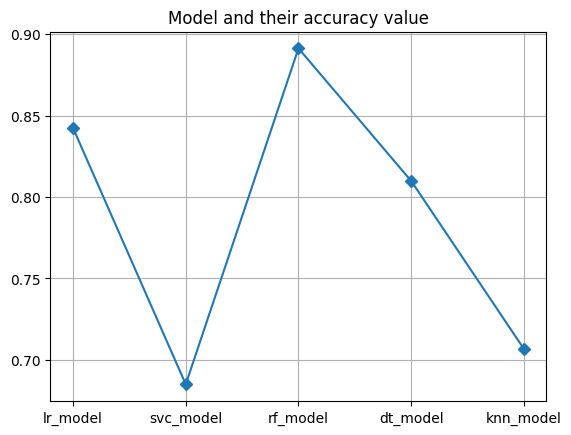

In [198]:
#plot model and accuracy
plt.title("Model and their accuracy value")
plt.plot(model_dict.keys(),acc_s,marker='D')
plt.grid()

In [199]:
rf_m=RandomForestClassifier()

In [200]:
rf_m.fit(X_train,y_train)

RandomForestClassifier()

In [201]:
import joblib

In [202]:
joblib.dump(rf_m,'model_heart.pt')

['model_heart.pt']